# The Spark foundation #GRIPJULY21

# Task 1 Prediction using Supervised ML

# Author - Ritika Tanwar

# Predict the percentage of an student based on the no. of study hours.

# What will be predicted score if a student studies for 9.25 hrs/ day?

# Dataset - http://bit.ly/w-data

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
#Loading the data in a pandas dataframe
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
#checking if there exists any null value in the dataframe
df.isnull().values.any()

False

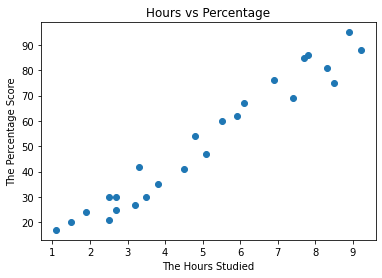

In [5]:
# As we can see there is no null values in the dataset 
#now we can visualize our data 
#plotting a scatter plot
plt.scatter(df.Hours,df.Scores)
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

In [8]:
# we can also use corr() function to get the correlation between columns of a dataframe
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting the dataset for training and testing purpose

In [9]:
X = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Training and fitting the data into the model

In [10]:
regressor = LinearRegression()    
regressor.fit(X_train, y_train)  
print('Model training completed')

Model training completed


# plotting the regression line

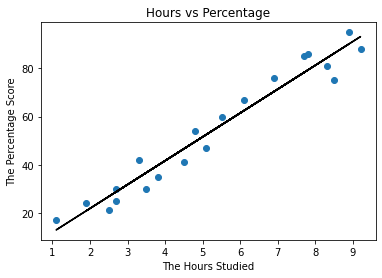

In [11]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), color='Black')
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

# Predicting the Percentage of Marks

In [12]:
pred_percent = regressor.predict(X_test)
prediction_df = pd.DataFrame([[hours[0],percentage] for hours,percentage in zip(X_test,pred_percent)])
prediction_df.columns=['Hours','Predicted_score']
prediction_df

,Hours,Predicted_score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [13]:
## comparing actual and predicted scores
prediction_df['Actual_score']=y_test
prediction_df

,Hours,Predicted_score,Actual_score
0,1.5,16.884145,20
1,3.2,33.732261,27
2,7.4,75.357018,69
3,2.5,26.794801,30
4,5.9,60.491033,62


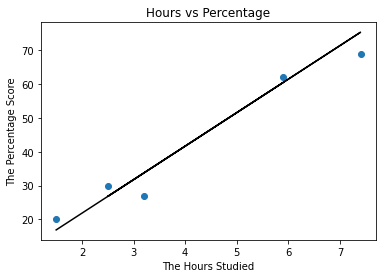

In [14]:
plt.scatter(prediction_df.Hours,prediction_df.Actual_score)
plt.plot(prediction_df.Hours,prediction_df.Predicted_score, color='Black')
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

# Model evaluation

In [15]:
mae = mean_absolute_error(y_test, pred_percent)
print("MAE:",mae)

rmse = np.sqrt(mean_squared_error(y_test, pred_percent))
print("RMSE:",rmse)

r2 =  r2_score(y_test, pred_percent)
print("R-Square:",r2)
print('Model Accuracy is',r2*100)

MAE: 4.183859899002982
RMSE: 4.647447612100373
R-Square: 0.9454906892105354
Model Accuracy is 94.54906892105353


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [16]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 93.69
